In [ ]:
import numpy as np

# Load datasets
X_train = np.load("dc1/data/X_train.npy")
Y_train = np.load("dc1/data/Y_train.npy")
X_test = np.load("dc1/data/X_test.npy")
Y_test = np.load("dc1/data/Y_test.npy")

# Print shapes
print(f"Train Images Shape: {X_train.shape}")
print(f"Train Labels Shape: {Y_train.shape}")
print(f"Test Images Shape: {X_test.shape}")
print(f"Test Labels Shape: {Y_test.shape}")


Train Images Shape: (16841, 1, 128, 128)
Train Labels Shape: (16841,)
Test Images Shape: (8420, 1, 128, 128)
Test Labels Shape: (8420,)


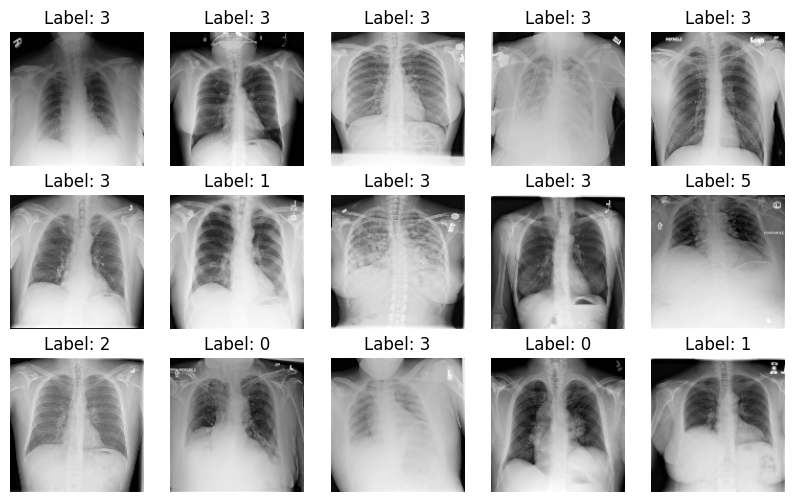

In [ ]:
import matplotlib.pyplot as plt

# Plot some sample images
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    img = X_train[i].squeeze()  # Remove channel dimension if grayscale
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Label: {Y_train[i]}")
    ax.axis("off")
plt.show()


0: Atelectasis
1: Effusion
2: Infiltration
3: No finding
4: Nodule
5: Pneumothorax

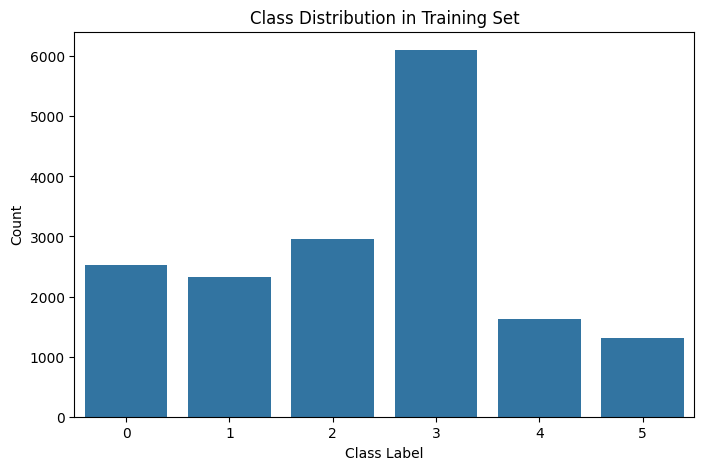

In [ ]:
import seaborn as sns
import pandas as pd

# Convert to Pandas DataFrame for visualization
df_labels = pd.DataFrame(Y_train, columns=["Label"])
plt.figure(figsize=(8, 5))
sns.countplot(x=df_labels["Label"])
plt.title("Class Distribution in Training Set")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
from dc1.net import Net
from dc1.batch_sampler import BatchSampler
from dc1.image_dataset import ImageDataset
from dc1.train_test import test_model

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the trained model
model = Net(n_classes=6)
model_path = "model_weights/model_02_25_11_46.txt"  # Update path if needed
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# Load test dataset
test_dataset = ImageDataset(Path("dc1/data/X_test.npy"), Path("dc1/data/Y_test.npy"))
test_sampler = BatchSampler(batch_size=100, dataset=test_dataset, balanced=True)

# Define loss function
loss_function = nn.CrossEntropyLoss()

# Evaluate the model
losses, all_predictions, all_labels = test_model(model, test_sampler, loss_function, device)

# Compute average loss
avg_test_loss = sum(loss.item() for loss in losses) / len(losses)
print(f"Test Loss: {avg_test_loss:.4f}")

# Compute accuracy
accuracy = sum(1 for x, y in zip(all_predictions, all_labels) if x == y) / len(all_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]
print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=class_names))

# Create and save confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save confusion matrix
now = datetime.now()
if not Path("artifacts/").exists():
    os.mkdir(Path("artifacts/"))

plt.savefig(Path("artifacts") / f"confusion_matrix_{now.month:02}_{now.day:02}_{now.hour}_{now.minute:02}.png")
plt.show()


C:\Users\20221205\AppData\Local\Temp\ipykernel_30952\3396404679.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locatio

Test Accuracy: 0.2592


AttributeError: 'float' object has no attribute 'item'

C:\Users\20221205\AppData\Local\Temp\ipykernel_18316\2050186434.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locatio

Test Loss: 1.7296
Test Accuracy: 24.62%

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.25      0.60      0.35       681
     Class 1       0.29      0.24      0.26       681
     Class 2       0.20      0.40      0.27       681
     Class 3       0.29      0.05      0.09       681
     Class 4       0.28      0.13      0.17       681
     Class 5       0.41      0.06      0.10       681

    accuracy                           0.25      4086
   macro avg       0.29      0.25      0.21      4086
weighted avg       0.29      0.25      0.21      4086



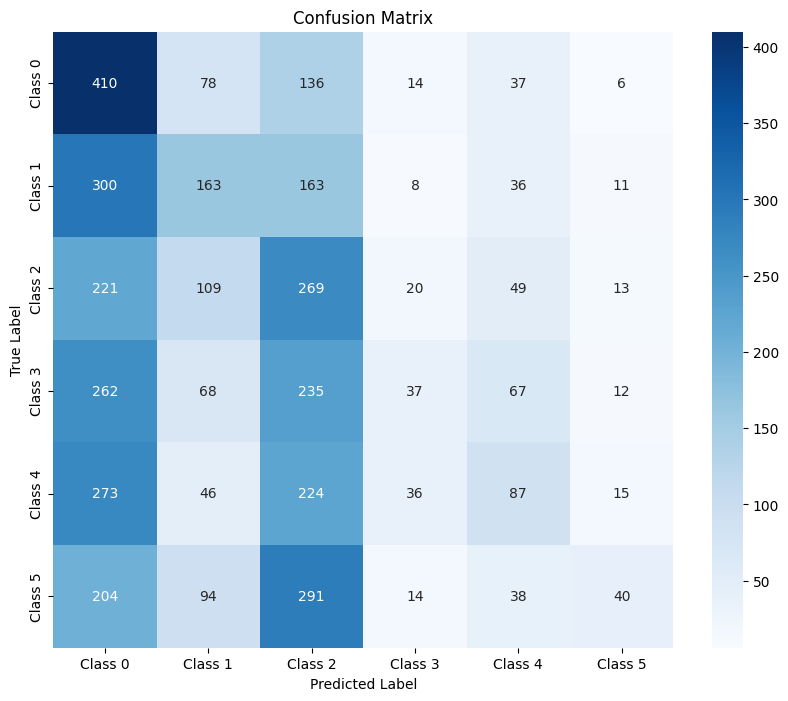

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
from dc1.net import Net
from dc1.batch_sampler import BatchSampler
from dc1.image_dataset import ImageDataset
from dc1.train_test import test_model

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the trained model
model = Net(n_classes=6)
model_path = "model_weights/model_02_20_12_31.txt"  # Update path if needed
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# Load test dataset
test_dataset = ImageDataset(Path("dc1/data/X_test.npy"), Path("dc1/data/Y_test.npy"))
test_sampler = BatchSampler(batch_size=100, dataset=test_dataset, balanced=True)

# Define loss function
loss_function = nn.CrossEntropyLoss()

# Evaluate the model
losses, all_predictions, all_labels = test_model(model, test_sampler, loss_function, device)

# Compute average loss
avg_test_loss = sum(loss.item() for loss in losses) / len(losses)
print(f"Test Loss: {avg_test_loss:.4f}")

# Compute accuracy
accuracy = sum(1 for x, y in zip(all_predictions, all_labels) if x == y) / len(all_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]
print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=class_names))

# Create and save confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save confusion matrix
now = datetime.now()
if not Path("artifacts/").exists():
    os.mkdir(Path("artifacts/"))

plt.savefig(Path("artifacts") / f"confusion_matrix_{now.month:02}_{now.day:02}_{now.hour}_{now.minute:02}.png")
plt.show()


C:\Users\20221205\AppData\Local\Temp\ipykernel_30952\4096279383.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locatio

Test Accuracy: 0.3436
Test Loss: 1.7598
Test Accuracy: 34.36%

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.32      0.46      0.38       681
     Class 1       0.45      0.51      0.48       681
     Class 2       0.29      0.27      0.28       681
     Class 3       0.26      0.25      0.25       681
     Class 4       0.28      0.10      0.14       681
     Class 5       0.40      0.48      0.43       681

    accuracy                           0.34      4086
   macro avg       0.33      0.34      0.33      4086
weighted avg       0.33      0.34      0.33      4086



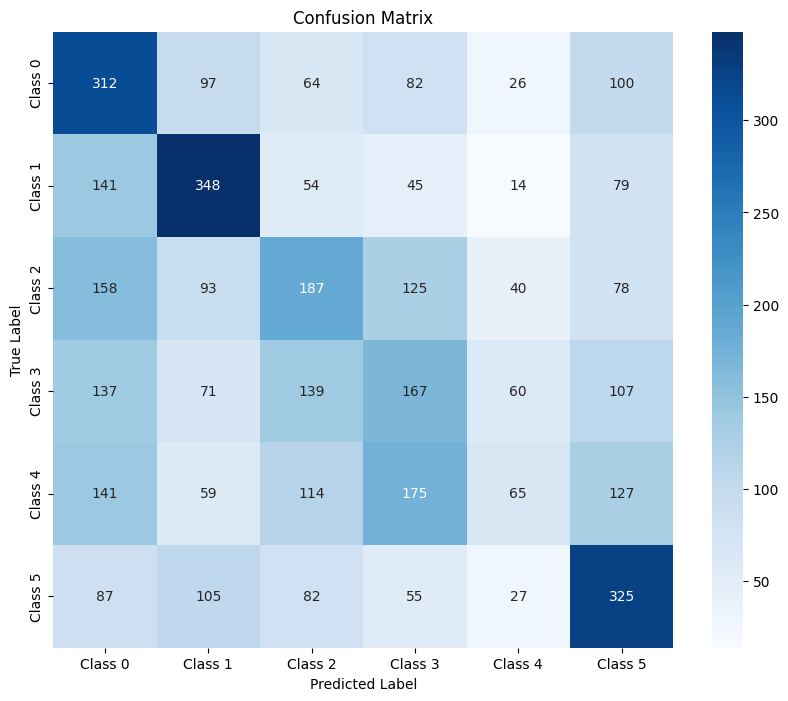

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
from dc1.net import Net
from dc1.batch_sampler import BatchSampler
from dc1.image_dataset import ImageDataset
from dc1.train_test import test_model
import torchvision.models as models


# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the trained model
model = models.resnet34(pretrained=True)

# Modify the first conv layer to accept 1-channel grayscale images
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Modify the fully connected layer for 6 output classes
#model.fc = nn.Linear(model.fc.in_features, 6)
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(0.3),  # Ensure this matches the saved model
    nn.Linear(num_ftrs, 6)
)


# Load trained model weights
model_path = "model_weights/resnet34_model_03_11_10_58.pt"  # Update the path
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# Load test dataset
test_dataset = ImageDataset(Path("dc1/data/X_test.npy"), Path("dc1/data/Y_test.npy"))
test_sampler = BatchSampler(batch_size=100, dataset=test_dataset, balanced=True)

# Define loss function
loss_function = nn.CrossEntropyLoss()

# Evaluate the model
losses, all_predictions, all_labels = test_model(model, test_sampler, loss_function, device)

# Compute average loss
avg_test_loss = sum(loss for loss in losses) / len(losses)
print(f"Test Loss: {avg_test_loss:.4f}")

# Compute accuracy
accuracy = sum(1 for x, y in zip(all_predictions, all_labels) if x == y) / len(all_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]
print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=class_names))

# Create and save confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save confusion matrix
now = datetime.now()
if not Path("artifacts/").exists():
    os.mkdir(Path("artifacts/"))

plt.savefig(Path("artifacts") / f"confusion_matrix_{now.month:02}_{now.day:02}_{now.hour}_{now.minute:02}.png")
plt.show()


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
from dc1.net import Net
from dc1.batch_sampler import BatchSampler
from dc1.image_dataset import ImageDataset
from dc1.train_test import test_model
from dc1.resnet18 import CustomResNet

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the trained model
model = Net(n_classes=6)
model_path = "model_weights/model_03_10_14_18.txt"  # Update path if needed
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# Load test dataset
test_dataset = ImageDataset(Path("dc1/data/X_test.npy"), Path("dc1/data/Y_test.npy"))
test_sampler = BatchSampler(batch_size=100, dataset=test_dataset, balanced=True)

# Define loss function
loss_function = nn.CrossEntropyLoss()

# Evaluate the model
losses, all_predictions, all_labels = test_model(model, test_sampler, loss_function, device)

# Compute average loss
avg_test_loss = sum(loss.item() for loss in losses) / len(losses)
print(f"Test Loss: {avg_test_loss:.4f}")

# Compute accuracy
accuracy = sum(1 for x, y in zip(all_predictions, all_labels) if x == y) / len(all_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]
print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=class_names))

# Create and save confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save confusion matrix
now = datetime.now()
if not Path("artifacts/").exists():
    os.mkdir(Path("artifacts/"))

plt.savefig(Path("artifacts") / f"confusion_matrix_{now.month:02}_{now.day:02}_{now.hour}_{now.minute:02}.png")
plt.show()


C:\Users\20221205\AppData\Local\Temp\ipykernel_30952\1920030298.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locatio

RuntimeError: Error(s) in loading state_dict for CustomResNet:
	Missing key(s) in state_dict: "layer1.0.downsample.0.weight", "layer1.0.downsample.1.weight", "layer1.0.downsample.1.bias", "layer1.0.downsample.1.running_mean", "layer1.0.downsample.1.running_var", "layer1.2.conv1.weight", "layer1.2.bn1.weight", "layer1.2.bn1.bias", "layer1.2.bn1.running_mean", "layer1.2.bn1.running_var", "layer1.2.conv2.weight", "layer1.2.bn2.weight", "layer1.2.bn2.bias", "layer1.2.bn2.running_mean", "layer1.2.bn2.running_var", "layer2.2.conv1.weight", "layer2.2.bn1.weight", "layer2.2.bn1.bias", "layer2.2.bn1.running_mean", "layer2.2.bn1.running_var", "layer2.2.conv2.weight", "layer2.2.bn2.weight", "layer2.2.bn2.bias", "layer2.2.bn2.running_mean", "layer2.2.bn2.running_var", "layer3.2.conv1.weight", "layer3.2.bn1.weight", "layer3.2.bn1.bias", "layer3.2.bn1.running_mean", "layer3.2.bn1.running_var", "layer3.2.conv2.weight", "layer3.2.bn2.weight", "layer3.2.bn2.bias", "layer3.2.bn2.running_mean", "layer3.2.bn2.running_var", "layer4.2.conv1.weight", "layer4.2.bn1.weight", "layer4.2.bn1.bias", "layer4.2.bn1.running_mean", "layer4.2.bn1.running_var", "layer4.2.conv2.weight", "layer4.2.bn2.weight", "layer4.2.bn2.bias", "layer4.2.bn2.running_mean", "layer4.2.bn2.running_var". 
	size mismatch for layer1.0.conv1.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 64, 3, 3]).
	size mismatch for layer1.0.bn1.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.0.bn1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.0.bn1.running_mean: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.0.bn1.running_var: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.0.conv2.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 128, 3, 3]).
	size mismatch for layer1.0.bn2.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.0.bn2.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.0.bn2.running_mean: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.0.bn2.running_var: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.1.conv1.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 128, 3, 3]).
	size mismatch for layer1.1.bn1.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.1.bn1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.1.bn1.running_mean: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.1.bn1.running_var: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.1.conv2.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 128, 3, 3]).
	size mismatch for layer1.1.bn2.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.1.bn2.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.1.bn2.running_mean: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer1.1.bn2.running_var: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layer2.0.conv1.weight: copying a param with shape torch.Size([128, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 128, 3, 3]).
	size mismatch for layer2.0.bn1.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.0.bn1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.0.bn1.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.0.bn1.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.0.conv2.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for layer2.0.bn2.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.0.bn2.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.0.bn2.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.0.bn2.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.0.downsample.0.weight: copying a param with shape torch.Size([128, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 128, 1, 1]).
	size mismatch for layer2.0.downsample.1.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.0.downsample.1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.0.downsample.1.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.0.downsample.1.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.1.conv1.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for layer2.1.bn1.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.1.bn1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.1.bn1.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.1.bn1.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.1.conv2.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for layer2.1.bn2.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.1.bn2.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.1.bn2.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer2.1.bn2.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for layer3.0.conv1.weight: copying a param with shape torch.Size([256, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 256, 3, 3]).
	size mismatch for layer3.0.bn1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.0.bn1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.0.bn1.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.0.bn1.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.0.conv2.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 512, 3, 3]).
	size mismatch for layer3.0.bn2.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.0.bn2.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.0.bn2.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.0.bn2.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.0.downsample.0.weight: copying a param with shape torch.Size([256, 128, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 256, 1, 1]).
	size mismatch for layer3.0.downsample.1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.0.downsample.1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.0.downsample.1.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.0.downsample.1.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.1.conv1.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 512, 3, 3]).
	size mismatch for layer3.1.bn1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.1.bn1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.1.bn1.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.1.bn1.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.1.conv2.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 512, 3, 3]).
	size mismatch for layer3.1.bn2.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.1.bn2.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.1.bn2.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer3.1.bn2.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer4.0.conv1.weight: copying a param with shape torch.Size([512, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([1024, 512, 3, 3]).
	size mismatch for layer4.0.bn1.weight: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.0.bn1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.0.bn1.running_mean: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.0.bn1.running_var: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.0.conv2.weight: copying a param with shape torch.Size([512, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([1024, 1024, 3, 3]).
	size mismatch for layer4.0.bn2.weight: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.0.bn2.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.0.bn2.running_mean: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.0.bn2.running_var: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.0.downsample.0.weight: copying a param with shape torch.Size([512, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1024, 512, 1, 1]).
	size mismatch for layer4.0.downsample.1.weight: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.0.downsample.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.0.downsample.1.running_mean: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.0.downsample.1.running_var: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.1.conv1.weight: copying a param with shape torch.Size([512, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([1024, 1024, 3, 3]).
	size mismatch for layer4.1.bn1.weight: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.1.bn1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.1.bn1.running_mean: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.1.bn1.running_var: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.1.conv2.weight: copying a param with shape torch.Size([512, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([1024, 1024, 3, 3]).
	size mismatch for layer4.1.bn2.weight: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.1.bn2.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.1.bn2.running_mean: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer4.1.bn2.running_var: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for fc.weight: copying a param with shape torch.Size([6, 512]) from checkpoint, the shape in current model is torch.Size([6, 1024]).

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
from dc1.net import Net
from dc1.batch_sampler import BatchSampler
from dc1.image_dataset import ImageDataset
from dc1.train_test import test_model

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the trained model
model = Net(n_classes=6)
model_path = "model_weights/model_02_23_8_51.txt"  # Update path if needed
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# Load test dataset
test_dataset = ImageDataset(Path("dc1/data/X_test.npy"), Path("dc1/data/Y_test.npy"))
test_sampler = BatchSampler(batch_size=100, dataset=test_dataset, balanced=True)

# Define loss function
loss_function = nn.CrossEntropyLoss()

# Evaluate the model
losses, all_predictions, all_labels = test_model(model, test_sampler, loss_function, device)

# Compute average loss
avg_test_loss = sum(loss.item() for loss in losses) / len(losses)
print(f"Test Loss: {avg_test_loss:.4f}")

# Compute accuracy
accuracy = sum(1 for x, y in zip(all_predictions, all_labels) if x == y) / len(all_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]
print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=class_names))

# Create and save confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
TP = np.diag(cm)  # True Positives
FP = cm.sum(axis=0) - TP  # False Positives
FN = cm.sum(axis=1) - TP  # False Negatives
TN = cm.sum() - (FP + FN + TP)  # True Negatives

# Compute Specificity, False Positive Rate (FPR), False Negative Rate (FNR)
specificity = TN / (TN + FP)
fpr = FP / (FP + TN)  # False Positive Rate
fnr = FN / (FN + TP)  # False Negative Rate

# Print additional metrics
for i, class_name in enumerate(class_names):
    print(f"\nClass: {class_name}")
    print(f"Specificity: {specificity[i]:.4f}")
    print(f"False Positive Rate (FPR): {fpr[i]:.4f}")
    print(f"False Negative Rate (FNR): {fnr[i]:.4f}")

C:\Users\20221205\AppData\Local\Temp\ipykernel_42028\2460521287.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locatio

Test Loss: 1.7261
Test Accuracy: 24.18%

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.25      0.55      0.35       681
     Class 1       0.29      0.30      0.30       681
     Class 2       0.19      0.30      0.23       681
     Class 3       0.24      0.17      0.20       681
     Class 4       0.24      0.11      0.15       681
     Class 5       0.36      0.03      0.05       681

    accuracy                           0.24      4086
   macro avg       0.26      0.24      0.21      4086
weighted avg       0.26      0.24      0.21      4086


Class: Class 0
Specificity: 0.6761
False Positive Rate (FPR): 0.3239
False Negative Rate (FNR): 0.4537

Class: Class 1
Specificity: 0.8552
False Positive Rate (FPR): 0.1448
False Negative Rate (FNR): 0.6975

Class: Class 2
Specificity: 0.7465
False Positive Rate (FPR): 0.2535
False Negative Rate (FNR): 0.7034

Class: Class 3
Specificity: 0.8913
False Positive Rate (FPR): 0.1087
False Negat

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
from dc1.image_dataset import ImageDataset
from dc1.batch_sampler import BatchSampler
from dc1.train_test import test_model

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load pretrained ResNet-34
model = models.resnet18(pretrained=True)

# Modify the first conv layer to accept 1-channel grayscale images
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Modify the fully connected layer for 6 output classes
model.fc = nn.Linear(model.fc.in_features, 6)

# Load trained model weights
model_path = "model_weights/resnet18_model_03_05_8_05.pt"  # Update the path
model.load_state_dict(torch.load(model_path, map_location=device))

# Move model to device
model.to(device)
model.eval()

# Load test dataset
test_dataset = ImageDataset(Path("dc1/data/X_test.npy"), Path("dc1/data/Y_test.npy"))
test_sampler = BatchSampler(batch_size=100, dataset=test_dataset, balanced=True)

# Define loss function
loss_function = nn.CrossEntropyLoss()

# Evaluate the model
losses, all_predictions, all_labels = test_model(model, test_sampler, loss_function, device)

# Compute average loss
avg_test_loss = sum(loss.item() for loss in losses) / len(losses)
print(f"Test Loss: {avg_test_loss:.4f}")

# Generate classification report
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Pneumothorax"]
report = classification_report(all_labels, all_predictions, target_names=class_names, digits=4)
print("\nClassification Report:\n", report)

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Extract performance metrics
TP = np.diag(cm)  # True Positives
FP = cm.sum(axis=0) - TP  # False Positives
FN = cm.sum(axis=1) - TP  # False Negatives
TN = cm.sum() - (FP + FN + TP)  # True Negatives

# Compute Specificity, False Positive Rate (FPR), False Negative Rate (FNR)
specificity = TN / (TN + FP)
fpr = FP / (FP + TN)  # False Positive Rate
fnr = FN / (FN + TP)  # False Negative Rate

# Print additional metrics
for i, class_name in enumerate(class_names):
    print(f"\nClass: {class_name}")
    print(f"Specificity: {specificity[i]:.4f}")
    print(f"False Positive Rate (FPR): {fpr[i]:.4f}")
    print(f"False Negative Rate (FNR): {fnr[i]:.4f}")




c:\Users\20221205\Desktop\JBG040-Group15-1\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\20221205\Desktop\JBG040-Group15-1\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\20221205\AppData\Local\Temp\ipykernel_42028\3650886344.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See

Test Loss: 1.9758

Classification Report:
               precision    recall  f1-score   support

     Class 0     0.3695    0.2849    0.3217       681
     Class 1     0.4229    0.4391    0.4308       681
     Class 2     0.3074    0.3363    0.3212       681
     Class 3     0.2653    0.1145    0.1600       681
     Class 4     0.2508    0.3421    0.2894       681
Pneumothorax     0.4097    0.5330    0.4633       681

    accuracy                         0.3417      4086
   macro avg     0.3376    0.3417    0.3311      4086
weighted avg     0.3376    0.3417    0.3311      4086


Class: Class 0
Specificity: 0.9028
False Positive Rate (FPR): 0.0972
False Negative Rate (FNR): 0.7151

Class: Class 1
Specificity: 0.8802
False Positive Rate (FPR): 0.1198
False Negative Rate (FNR): 0.5609

Class: Class 2
Specificity: 0.8485
False Positive Rate (FPR): 0.1515
False Negative Rate (FNR): 0.6637

Class: Class 3
Specificity: 0.9366
False Positive Rate (FPR): 0.0634
False Negative Rate (FNR): 0.885